# Feature Extraction

In this notebook, I will make use of the Mushroom Classification dataset to try to predict if a Mushroom is poisonous or not, by looking at the given features. I will successivelly try differerent feature extraction techniques to see how this can affect training times and overall model accuracy.

Reducing the number of features in a dataset, can lead to:

Accuracy improvements

Overfitting risk reduction

Speed up in training

Improved Data Visualization

# Data preprocessing

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import time
import os

In [5]:
df = pd.read_csv('mushrooms.csv')
pd.options.display.max_columns = None
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [17]:
df.shape

(8124, 23)

In [18]:
# df.isnull().sum()  # check is there any null value or not


percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
class,0.0
stalk-surface-above-ring,0.0
population,0.0
spore-print-color,0.0
ring-type,0.0
ring-number,0.0
veil-color,0.0
veil-type,0.0
stalk-color-below-ring,0.0
stalk-color-above-ring,0.0


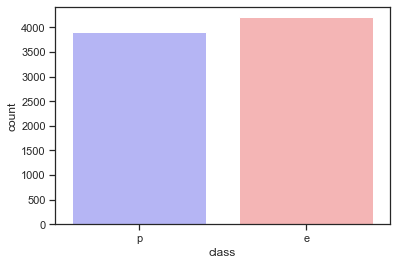

In [19]:
# read a ticks.csv file from seaborn libraray
sns.set(style="ticks")
# count plot on single categorical variable
f = sns.countplot(x="class", data=df, palette="bwr")
plt.show()

In [20]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [21]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [22]:
X = pd.get_dummies(X, prefix_sep='_')
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
len(X.columns)

117

In [24]:
Y = LabelEncoder().fit_transform(Y)    #categorical or test data ke numerical e convert
#np.set_printoptions(threshold=np.inf)
Y

array([1, 0, 0, ..., 0, 1, 0])

# Machine Learning

Before feeding this data into our Machine Learning models I decided to divide our data into features (X) and labels (Y) and One Hot Encode all the Categorical Variables.

Successively, I decided to create a function (forest_test) to divide the input data into train and test sets and then train and test a Random Forest Classifier.

We can now use this function using the whole dataset and then use it successively to compare these results when using instead of the whole dataset just a reduced version.


In [25]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X = StandardScaler().fit_transform(X)

In [26]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [28]:
def complete_test_2D(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2'])
    Small_df = pd.concat([Small_df, df['class']], axis = 1)
    Small_df['class'] = LabelEncoder().fit_transform(Small_df['class'])
    forest_test(X, Y)
    data = []
    for clas, col, name in zip((1, 0), ['red', 'darkblue'], ['Poisonous', 'Edible']):

        trace = dict(
            type='scatter',
            x= Small_df.loc[Small_df['class'] == clas, 'C1'],
            y= Small_df.loc[Small_df['class'] == clas, 'C2'],
            mode= 'markers',
            name= name,
            marker=dict(
                color=col,
                size=12,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8)
        )
        data.append(trace)

    layout = dict(
            title= plot_name + ' 2D Dimensionality Reduction',
            xaxis=dict(title='C1', showline=False),
            yaxis=dict(title='C2', showline=False)
    )
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [29]:

def complete_test_3D(X, Y, plot_name = ''):
    Small_df = pd.DataFrame(data = X, columns = ['C1', 'C2', 'C3'])
    Small_df = pd.concat([Small_df, df['class']], axis = 1)
    Small_df['class'] = LabelEncoder().fit_transform(Small_df['class'])
    forest_test(X, Y)
    data = []
    for clas, col, name in zip((1, 0), ['red', 'darkblue'], ['Poisonous', 'Edible']):

        trace = dict(
            type='scatter3d',
            x= Small_df.loc[Small_df['class'] == clas, 'C1'],
            y= Small_df.loc[Small_df['class'] == clas, 'C2'],
            z= Small_df.loc[Small_df['class'] == clas, 'C3'],
            mode= 'markers',
            name= name
        )
        data.append(trace)

    layout = {
        "scene": {
          "xaxis": {
            "title": "C1", 
            "showline": False
          }, 
          "yaxis": {
            "title": "C2", 
            "showline": False
          }, 
          "zaxis": {
            "title": "C3", 
            "showline": False
          }
        }, 
        "title": plot_name + ' 3D Dimensionality Reduction'
    }
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [30]:
forest_test(X, Y)

4.015625
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



As shown above, training a Random Forest classifier using all the features, led to 100% Accuracy in about 4.1875s of training time. In each of the following examples, the training time of each model will be printed out on the first line of each snippet for your reference.

# Principal Component Analysis (PCA)

PCA is one of the most used linear dimensionality reduction technique. When using PCA, we take as input our original data and try to find a combination of the input features which can best summarize the original data distribution so that to reduce its original dimensions. PCA is able to do this by maximizing variances and minimizing the reconstruction error by looking at pair wised distances. In PCA, our original data is projected into a set of orthogonal axes and each of the axes gets ranked in order of importance. 

PCA is an unsupervised learning algorithm, therefore it doesn't care about the data labels but only about variation. This can lead in some cases to misclassification of data.

In this example, I will first perform PCA in the whole dataset to reduce our data to just two dimensions and I will then construct a data frame with our new features and their respective labels.

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['class']], axis = 1)
PCA_df['class'] = LabelEncoder().fit_transform(PCA_df['class'])
PCA_df.head()

,PC1,PC2,class
0,-3.284717,1.020106,1
1,-3.969401,-0.857002,0
2,-4.958522,-0.211199,0
3,-3.469958,0.337944,1
4,-2.726516,0.889570,0


<h4>Using our newly created data frame, we can now plot our data distribution in a 2D scatter plot.</h4>

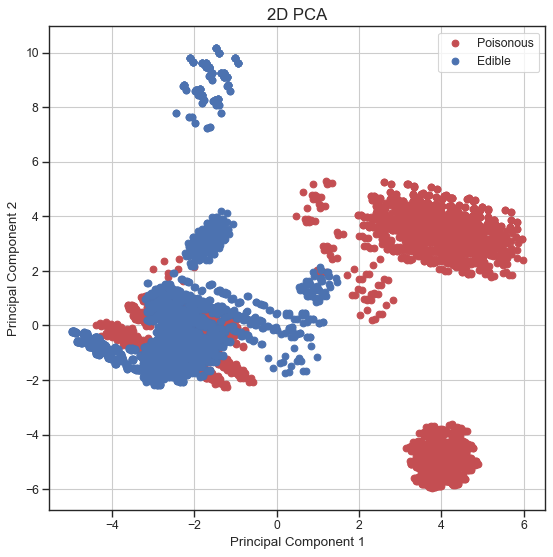

In [32]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'], PCA_df.loc[PCA_df['class'] == clas, 'PC2'], c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

We can now repeat this same process keeping instead 3 dimensions and creating animations using Plotly (feel free to interact with the animation below!)

In [33]:
pca.explained_variance_ratio_

array([0.08891017, 0.08125474])

Running again a Random Forest Classifier using the set of 3 features constructed by PCA (instead of the whole dataset) led to 98% classification accuracy while using just 2 features 95% accuracy.

In [36]:
complete_test_2D(X_pca, Y, 'PCA')


5.671875
[[1242   32]
 [  91 1073]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1274
           1       0.97      0.92      0.95      1164

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [37]:
var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_ratio,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_ratio,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance Ratio by each principal components',
    yaxis=dict(
        title='Explained variance ratio in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
iplot(fig)


While using PCA, we can also explore how much of the original data variance was preserved using the explained_variance_ratio_ Scikit-learn function. Once calculated the variance ratio, we can then go on creating fancy visualization graphs.

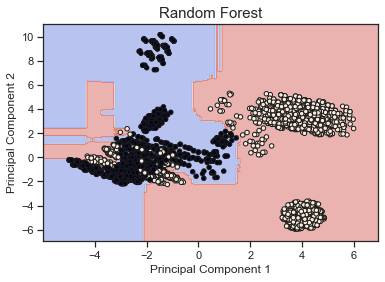

In [38]:
from itertools import product

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = trainedforest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('Random Forest', fontsize = 15)
plt.show()

<h2> t-Distributed Stochastic Neighbor Embedding (t-SNE)</h2>

<h2>Linear Discriminant Analysis (LDA)

Indipendent Component Analysis (ICA)

Locally Linear Embedding (LLE)

Autoencoders</h2>

#These techniques will practise later
